# Название проекта: Анализ баз данных сервиса StackOverflow

StackOverflow — сервис вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам.

**Исходные данные**

Таблица **stackoverflow.badges** - хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql. 

**Структура таблицы:**
- id - Идентификатор значка, первичный ключ таблицы;
- name - Название значка;
- user_id - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице users;
- creation_date - Дата присвоения значка.

Таблица **stackoverflow.post_types** - содержит информацию о типе постов. Их может быть два:
   - **Question** — пост с вопросом;
   - **Answer** — пост с ответом.

**Структура таблицы:** 
- id - Идентификатор типа поста, первичный ключ таблицы;
- type - Тип поста.

Таблица **stackoverflow.posts** - содержит информацию о постах.

**Структура таблицы:**
- id - Идентификатор поста, первичный ключ таблицы;
- title - Заголовок поста;
- creation_date - Дата создания поста;
- creation_date - Дата создания поста;
- favorites_count - Число, которое показывает, сколько раз пост добавили в «Закладки»;
- last_activity_date - Дата последнего действия в посте, например комментария;
- last_edit_date - Дата последнего изменения поста;
- user_id - Идентификатор пользователя, который создал пост, внешний ключ к таблице users;
- parent_id - Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом;
- post_type_id - Идентификатор типа поста, внешний ключ к таблице post_types;
- score - Количество очков, которое набрал пост;
- views_count - Количество просмотров.

Таблица **stackoverflow.users** - содержит информацию о пользователях.

**Структура таблицы:**
- id - Идентификатор пользователя, первичный ключ таблицы;
- creation_date - Дата регистрации пользователя;
- display_name - Имя пользователя;
- last_access_date - Дата последнего входа;
- location - Местоположение;
- reputation - Очки репутации, которые получают за хорошие вопросы и полезные ответы;
- views - Число просмотров профиля пользователя.

Таблица **stackoverflow.vote_types** - содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько:
   - **UpMod** — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными;
   - **DownMod** — такую отметку получают посты, которые показались пользователям наименее полезными;
   - **Close** — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы;
   - **Offensive** — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста;
   - **Spam** — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

**Структура таблицы:**
- id - Идентификатор типа голоса, первичный ключ;
- name - Название метки.

Таблица **stackoverflow.votes** - содержит информацию о голосах за посты. 

**Структура таблицы:**
- id - Идентификатор голоса, первичный ключ;
- post_id - Идентификатор поста, внешний ключ к таблице posts;
- user_id - Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users;
- bounty_amount - Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту;
- vote_type_id - Идентификатор типа голоса, внешний ключ к таблице vote_types;
- creation_date - Дата назначения голоса.


                                                       **ER-диаграмма базы**

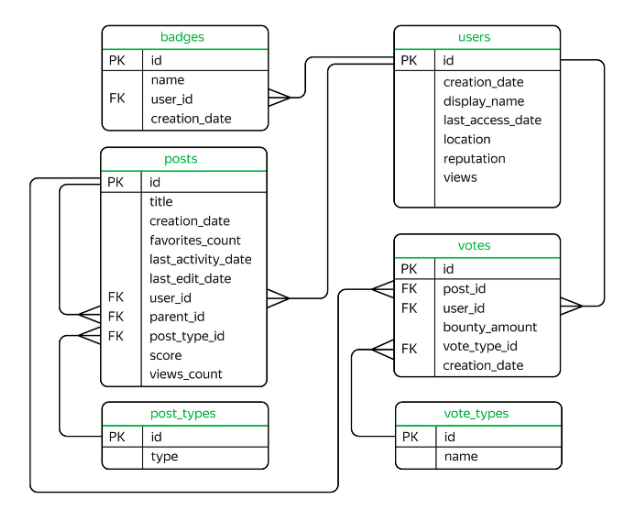

Проект состоит из двух частей, выполнение в SQL-тренажёре.

В первой части необходимо решить несколько задач в SQL-тренажёре, чтобы закрепить пройденный материал.
Вторая часть проекта — аналитическая. Проверять задачи по-прежнему будет тренажёр. Рекомендуется самостоятельно анализировать полученные результаты и формулировать выводы.


## Изучение файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import sqlalchemy as sa

In [66]:
# установили параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-advanced-sql' # название базы данных
            }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [67]:
# сохранили коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [68]:
# чтобы выполнить SQL-запрос, написали функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

In [69]:
#записали список таблиц в переменную tables
tables = ['stackoverflow.badges', 
          'stackoverflow.post_types', 
          'stackoverflow.posts', 
          'stackoverflow.users', 
          'stackoverflow.vote_types',
          'stackoverflow.votes'
         ]
tables

['stackoverflow.badges',
 'stackoverflow.post_types',
 'stackoverflow.posts',
 'stackoverflow.users',
 'stackoverflow.vote_types',
 'stackoverflow.votes']

In [70]:
# написали функцию котрая выводить первые 5 строк таблицы и количество строк из SQL запросов
def info(tables):
    for i in tables:
        info = f'''
        SELECT * 
        FROM {i} 
        LIMIT 5
        '''
        count = f'''
        SELECT count(*) 
        FROM {i}
        '''
        print(f'Taблица - {i}, вывели первые 5 строк')
        display(get_sql_data(info))
        print(f'Количество строк в таблице - {get_sql_data(count).iat[0,0]}')
        print(100*'*')

In [71]:
info(tables)

Taблица - stackoverflow.badges, вывели первые 5 строк


,id,name,user_id,creation_date
0,82947,Teacher,994,2008-09-15 08:55:04
1,82949,Teacher,3893,2008-09-15 08:55:04
2,82950,Teacher,4591,2008-09-15 08:55:04
3,82951,Teacher,5196,2008-09-15 08:55:04
4,82952,Teacher,2635,2008-09-15 08:55:04


Количество строк в таблице - 330130
****************************************************************************************************
Taблица - stackoverflow.post_types, вывели первые 5 строк


,id,type
0,1,Question
1,2,Answer


Количество строк в таблице - 2
****************************************************************************************************
Taблица - stackoverflow.posts, вывели первые 5 строк


,id,title,creation_date,favorites_count,last_activity_date,last_edit_date,user_id,parent_id,post_type_id,score,views_count
0,4,Convert Decimal to Double?,2008-07-31 21:42:53,41,2018-07-02 17:55:27.247,2018-07-02 17:55:27,8,0,1,573,37080
1,6,Percentage width child element in absolutely p...,2008-07-31 22:08:09,10,2016-03-19 06:10:52.170,2016-03-19 06:05:48,9,0,1,256,16306
2,7,None,2008-07-31 22:17:58,0,2017-12-16 05:06:57.613,2017-12-16 05:06:58,9,4,2,401,0
3,9,How do I calculate someone's age in C#?,2008-07-31 23:41:00,399,2018-07-25 11:57:14.110,2018-04-21 17:48:14,1,0,1,1743,480476
4,11,Calculate relative time in C#,2008-07-31 23:55:38,529,2018-07-05 04:00:56.633,2017-06-04 15:51:20,1,0,1,1348,136033


Количество строк в таблице - 243796
****************************************************************************************************
Taблица - stackoverflow.users, вывели первые 5 строк


,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700


Количество строк в таблице - 24044
****************************************************************************************************
Taблица - stackoverflow.vote_types, вывели первые 5 строк


,id,name
0,1,AcceptedByOriginator
1,2,UpMod
2,3,DownMod
3,4,Offensive
4,5,Favorite


Количество строк в таблице - 15
****************************************************************************************************
Taблица - stackoverflow.votes, вывели первые 5 строк


,id,post_id,user_id,bounty_amount,vote_type_id,creation_date
0,434364,146794,4918,None,5,2008-10-03
1,434366,135535,16511,None,3,2008-10-03
2,434372,162181,12818,None,1,2008-10-03
3,434380,21965,4002,None,1,2008-10-03
4,434401,165975,8161,None,2,2008-10-03


Количество строк в таблице - 58790
****************************************************************************************************


## Часть 1

### Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [9]:
query = f'''
SELECT COUNT(*)
FROM stackoverflow.posts AS p
WHERE (favorites_count >=100
   OR score > 300)
   AND post_type_id IN (SELECT id
             FROM stackoverflow.post_types
             WHERE type = 'Question')
'''

In [14]:
get_sql_data(query).iat[0,0]

1355

### Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

In [15]:
query = f'''
WITH
question_id AS (
SELECT id
FROM stackoverflow.post_types
WHERE type = 'Question'
),
count_post AS (
SELECT COUNT(post_type_id) AS count_post
FROM  stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-18'
   AND post_type_id IN (
       SELECT id
FROM stackoverflow.post_types
WHERE type = 'Question'
   )
GROUP BY creation_date::date
ORDER BY creation_date::date
)
SELECT ROUND(AVG(count_post))
FROM count_post
'''

In [20]:
get_sql_data(query).iat[0,0].astype('int')

383

### Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [21]:
query = f'''
SELECT COUNT(DISTINCT(u.id))
FROM stackoverflow.badges AS b
JOIN stackoverflow.users AS u ON u.id=b.user_id
WHERE b.creation_date::date = u.creation_date::date
'''

In [22]:
get_sql_data(query).iat[0,0]

7047

### Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [23]:
query = f'''
WITH
joel_coehoorn AS (
SELECT id
FROM stackoverflow.users
WHERE display_name = 'Joel Coehoorn'
)
SELECT COUNT(DISTINCT p.id)
FROM stackoverflow.posts AS p
JOIN joel_coehoorn AS j ON p.user_id = j.id
JOIN stackoverflow.votes AS v ON v.post_id = p.id
'''

In [24]:
get_sql_data(query).iat[0,0]

12

### Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

In [25]:
query = f'''
SELECT *,
       RANK() OVER (ORDER BY id DESC)
FROM stackoverflow.vote_types
ORDER BY id
'''

In [26]:
get_sql_data(query)

,id,name,rank
0,1,AcceptedByOriginator,15
1,2,UpMod,14
2,3,DownMod,13
3,4,Offensive,12
4,5,Favorite,11
5,6,Close,10
6,7,Reopen,9
7,8,BountyStart,8
8,9,BountyClose,7
9,10,Deletion,6


### Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [27]:
query = f'''
WITH
close_id AS (
SELECT id
FROM stackoverflow.vote_types
WHERE name = 'Close'
)
SELECT user_id,
       COUNT(v.id)
FROM stackoverflow.votes AS v
JOIN close_id AS c ON v.vote_type_id = c.id
GROUP BY user_id
ORDER BY COUNT(v.id) DESC
LIMIT 10
'''

In [28]:
get_sql_data(query)

,user_id,count
0,20646,36
1,14728,36
2,27163,29
3,41158,24
4,24820,23
5,9345,23
6,3241,23
7,44330,20
8,38426,19
9,19074,19


### Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно. 
Отобразите несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.
Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.  
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [29]:
query = f'''
SELECT user_id,
      COUNT(id),
      DENSE_RANK() OVER (ORDER BY COUNT(id) DESC)
FROM stackoverflow.badges
WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY user_id
ORDER BY COUNT(id) DESC,
         user_id
LIMIT 10
'''

In [30]:
get_sql_data(query)

,user_id,count,dense_rank
0,22656,149,1
1,34509,45,2
2,1288,40,3
3,5190,31,4
4,13913,30,5
5,893,28,6
6,10661,28,6
7,33213,25,7
8,12950,23,8
9,25222,20,9


### Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [31]:
query = f'''
SELECT title,
       user_id,
       score,
       ROUND(AVG(score) OVER (PARTITION BY user_id))
FROM stackoverflow.posts
WHERE title != '' 
  AND score != 0
'''

In [32]:
get_sql_data(query)

,title,user_id,score,round
0,Diagnosing Deadlocks in SQL Server 2005,1,82,573.0
1,How do I calculate someone's age in C#?,1,1743,573.0
2,Why doesn't IE7 copy <pre><code> blocks to the...,1,37,573.0
3,Calculate relative time in C#,1,1348,573.0
4,Wrapping StopWatch timing with a delegate or l...,1,92,573.0
...,...,...,...,...
47349,Multi-lingual projects in Visual Studio,3742716,1,1.0
47350,Change datatype when importing Excel file into...,3930756,5,5.0
47351,How to host a Silverlight app in a Sharepoint ...,4020932,8,8.0
47352,Getting counts for a paged SQL search stored p...,5696608,2,2.0


### Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [33]:
query = f'''
WITH
count_1000 AS (
SELECT user_id,
       COUNT(id)
FROM stackoverflow.badges
GROUP BY user_id
HAVING COUNT(id) > 1000
ORDER BY COUNT(id) DESC
)
SELECT p.title
FROM stackoverflow.posts AS p
JOIN count_1000 AS c ON p.user_id = c.user_id
WHERE p.title != ''
'''

In [34]:
get_sql_data(query)

,title
0,What's the strangest corner case you've seen i...
1,What's the hardest or most misunderstood aspec...
2,What are the correct version numbers for C#?
3,Project management to go with GitHub


### Напишите запрос, который выгрузит данные о пользователях из Канады (англ. Canada). 
Разделите пользователей на три группы в зависимости от количества просмотров их профилей:

- пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
- пользователям с числом просмотров меньше 100 — группу 3.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу.  
Пользователи с количеством просмотров меньше либо равным нулю не должны войти в итоговую таблицу.

In [35]:
query = f'''
SELECT id,
       views,
       CASE
       WHEN views >= 350 THEN 1
       WHEN views >= 100 THEN 2
       ELSE 3
       END
FROM stackoverflow.users
WHERE location LIKE '%Canada%'
  AND views != 0
'''

In [36]:
get_sql_data(query)

,id,views,case
0,22,1079,1
1,34,1707,1
2,37,757,1
3,41,174,2
4,42,1063,1
...,...,...,...
832,431315,103,2
833,266220,13,3
834,474548,24,3
835,455635,17,3


### Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [37]:
query = f'''
WITH
gruppa AS (
SELECT id,
       CASE
       WHEN views >= 350 THEN 1
       WHEN views >= 100 THEN 2
       ELSE 3
       END AS gruppa,
       views
FROM stackoverflow.users
WHERE location LIKE '%Canada%'
  AND views != 0
ORDER BY views DESC,
         id
),
max_views AS (
SELECT gruppa,
       MAX(views) AS max_views
FROM gruppa
GROUP BY gruppa
)
SELECT id,
       gruppa.gruppa,
       views
FROM gruppa JOIN max_views ON gruppa.gruppa = max_views.gruppa
WHERE views = max_views
ORDER BY views DESC,
         id 
'''

In [38]:
get_sql_data(query)

,id,gruppa,views
0,3153,1,21991
1,46981,2,349
2,3444,3,99
3,22273,3,99
4,190298,3,99


### Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

In [39]:
query = f'''
SELECT EXTRACT(DAY FROM creation_date::date),
       COUNT(id),
       SUM(COUNT(id)) OVER (ORDER BY creation_date::date)
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
GROUP BY creation_date::date
ORDER BY creation_date::date
'''

In [40]:
get_sql_data(query)

,extract,count,sum
0,1.0,34,34.0
1,2.0,48,82.0
2,3.0,75,157.0
3,4.0,192,349.0
4,5.0,122,471.0
5,6.0,132,603.0
6,7.0,104,707.0
7,8.0,42,749.0
8,9.0,45,794.0
9,10.0,93,887.0


### Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом.

In [41]:
query = f'''
WITH
time_post AS (
SELECT DISTINCT
       user_id,
       MIN(creation_date) OVER (PARTITION BY user_id) AS time_post
FROM stackoverflow.posts
)
SELECT p.user_id,
       time_post - u.creation_date
FROM stackoverflow.users AS u
JOIN time_post AS p ON u.id = p.user_id
'''

In [42]:
get_sql_data(query)

,user_id,?column?
0,41040,0 days 00:20:34
1,18721,0 days 00:17:46
2,279,2 days 00:07:41
3,19068,1 days 01:54:55
4,12318,0 days 00:00:00
...,...,...
18844,2041950,0 days 00:27:15
18845,38256,5 days 06:47:40
18846,48082,0 days 00:00:00
18847,17287,11 days 12:51:42


## Часть 2

### Выведите общую сумму просмотров у постов, опубликованных в каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [43]:
query = f'''
SELECT DATE_TRUNC('month',  creation_date)::date AS months,
       SUM(views_count ) AS sum_post
FROM  stackoverflow.posts
GROUP BY months
ORDER BY sum_post DESC
'''

In [44]:
get_sql_data(query)

,months,sum_post
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Повышенная активность в сентябре и октябре возможно связана с началом учебного года. Малая активность в июле может быть связана с неполнотой данных.

### Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений user_id. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [46]:
query = f'''
WITH
answer_post AS (
SELECT id 
FROM stackoverflow.post_types
WHERE type = 'Answer'
),
count_post AS (
SELECT COUNT(DISTINCT(p.user_id)) AS count_user,
       u.display_name,
       COUNT(p.id) AS count_post
FROM stackoverflow.posts AS p
JOIN answer_post AS a ON a.id = p.post_type_id
JOIN stackoverflow.users AS u ON u.id = p.user_id
WHERE p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month')
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY COUNT(p.id) DESC
)
SELECT display_name,
       count_user
FROM count_post
ORDER BY display_name
'''

In [47]:
get_sql_data(query)

,display_name,count_user
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Одному имени пользователя должен соответствовать один user_id. Но это не так: многим популярным именам вроде Alan, Dan или Chris соответствует несколько user_id. Данные лучше не анализировать по имени, иначе результаты будут некорректными.

### Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [48]:
query = f'''
WITH
user_post AS (
SELECT DISTINCT p.user_id
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u ON u.id = p.user_id
WHERE u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30'
  AND p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31'
)
SELECT DATE_TRUNC('month', p.creation_date)::date AS month,
       COUNT(p.id)
FROM stackoverflow.posts AS p
JOIN user_post AS u ON p.user_id = u.user_id
GROUP BY month
ORDER BY month DESC
'''

In [49]:
get_sql_data(query)

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


В итоговой таблице встречаются аномальные значения: пользователи зарегистрированные в сентябре, были активны и в августе. Возможно это ошибка в данных.

### Используя данные о постах, выведите несколько полей:
- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумма просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [50]:
query = f'''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
ORDER BY user_id
'''

In [51]:
get_sql_data(query)

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


В теории все расчеты с оконной функцией можно выполнить и без нее. Но размер запроса имеет взначение.

### Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

In [52]:
query = f'''
WITH
action_user AS (
SELECT user_id,
       COUNT(DISTINCT(creation_date::date))
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
GROUP BY user_id
)
SELECT ROUND(AVG(count))
FROM action_user
'''

In [55]:
get_sql_data(query).iat[0,0].astype('int')

2

В среднем два дня в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой.

### На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
- Номер месяца.
- Количество постов за месяц.
- Процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип numeric.

In [56]:
query = f'''
WITH
count_post AS (
SELECT EXTRACT(MONTH FROM creation_date) AS months,
       COUNT(id) AS count_post,
       LAG(COUNT(id)) OVER (ORDER BY EXTRACT(MONTH FROM creation_date)) AS previous_count_post
FROM  stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY months
ORDER BY months
)
SELECT months,
       count_post,
       ROUND((count_post::numeric / previous_count_post) * 100 - 100, 2)
FROM count_post
'''

In [57]:
get_sql_data(query)

,months,count_post,round
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Количество постов ежемесячно с 1 сентября по 31 декабря 2008 года уменьшалось. Наибольшее снижение было в ноябре, количество постов уменьшилось на 25% по сравнению с октябрем.

### Найдите пользователя, который опубликовал больше всего постов за всё время с момента регистрации. Выведите данные его активности за октябрь 2008 года в таком виде:
- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [58]:
query = f'''
WITH
max_post_user AS (
SELECT user_id,
       COUNT(id)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY COUNT(id) DESC
LIMIT 1
)
SELECT DISTINCT
       EXTRACT(WEEK FROM creation_date) AS num_week,
       MAX(creation_date) OVER (PARTITION BY EXTRACT(WEEK FROM creation_date))
FROM stackoverflow.posts AS p JOIN max_post_user AS u ON p.user_id=u.user_id
WHERE creation_date::date BETWEEN '2008-10-01' AND '2008-10-31'
'''

In [59]:
get_sql_data(query)

,num_week,max
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


Выведена активность пользователя за октябрь 2008 года, который опубликовал больше всего постов за все время.